# Data-analysis of Titanic Deaths

In [150]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree


# Load CSV into Dataframe from Data folder
titanic = pd.read_csv('data/train-2.csv')

In [151]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [152]:
def convert_col_to_numerical(df, col):
    unique_vals = df[col].unique()
    val_dict = {}
    count = 0
    for val in unique_vals:
        val_dict[val] = count
        count += 1
    df[col] = df[col].replace(val_dict)
    return df

titanic = convert_col_to_numerical(titanic, 'Sex') # Male = 0 | Female = 1
titanic = convert_col_to_numerical(titanic, 'Embarked') # S = 0 | C = 1 | Q = 2

titanic.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

In [153]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0


<Axes: >

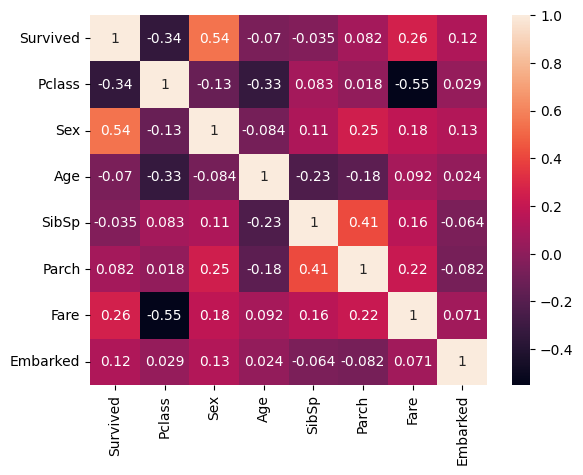

In [154]:
sns.heatmap(titanic.corr(), annot=True)

In [155]:
print(titanic.shape)
titanic.loc[titanic["Age"]<=18].value_counts()

(891, 8)


Survived  Pclass  Sex  Age    SibSp  Parch  Fare     Embarked
0         3       0    17.00  0      0      8.6625   0.0         3
          2       0    18.00  0      0      11.5000  0.0         2
1         3       1    0.75   2      1      19.2583  1.0         2
          2       1    5.00   1      2      27.7500  0.0         1
                  0    8.00   1      1      36.7500  0.0         1
                                                                ..
0         3       0    18.00  0      0      8.3000   0.0         1
                                            7.7958   0.0         1
                                            7.7750   0.0         1
                                            7.7500   0.0         1
1         3       1    18.00  0      1      9.3500   0.0         1
Name: count, Length: 135, dtype: int64

In [156]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


In [157]:
X = titanic.drop(['Survived'], axis=1)
y  = titanic['Survived']

X_train = X[:int(0.8*len(X))]
y_train = y[:int(0.8*len(y))]

X_test = X[int(0.8*len(X)):]
y_test = y[int(0.8*len(y)):]

In [158]:
KNN = KNeighborsClassifier(n_neighbors=12)
KNN.fit(X_train, y_train)
print(KNN.score(X_test, y_test))

DT = DecisionTreeClassifier(max_leaf_nodes=26)
DT.fit(X_train, y_train)
DT.score(X_test, y_test)



0.7486033519553073


0.8659217877094972

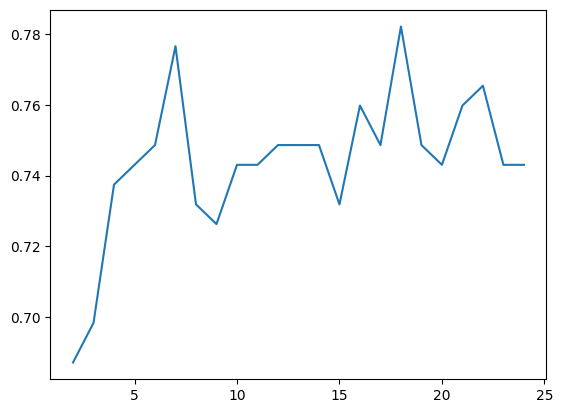

In [159]:
# 12 ist der beste KNN
scores = []
for i in range(2, 25):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train, y_train)
    scores.append(KNN.score(X_test, y_test))
plt.plot(range(2, 25), scores)
plt.show()


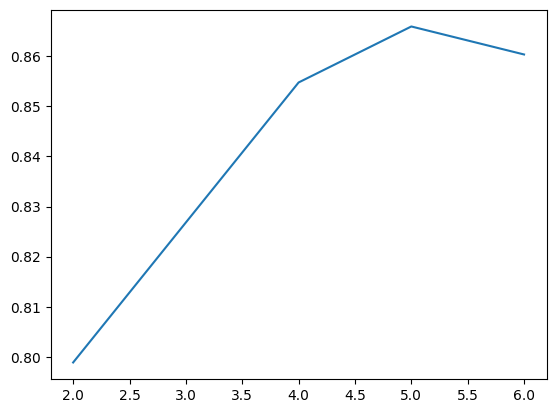

In [160]:
# 26 ist die beste Anzahl an leaf nodes
scores = []
for i in range(2, 7):
    DT = DecisionTreeClassifier(max_leaf_nodes=26, max_depth=i)
    DT.fit(X_train, y_train)
    scores.append(DT.score(X_test, y_test))
plt.plot(range(2, 7), scores)
plt.show()

[Text(0.5220588235294118, 0.9285714285714286, 'x[1] <= 0.5\ngini = 0.476\nsamples = 712\nvalue = [434, 278]'),
 Text(0.2867647058823529, 0.7857142857142857, 'x[0] <= 1.5\ngini = 0.311\nsamples = 456\nvalue = [368, 88]'),
 Text(0.14705882352941177, 0.6428571428571429, 'x[2] <= 53.0\ngini = 0.462\nsamples = 102\nvalue = [65, 37]'),
 Text(0.058823529411764705, 0.5, 'x[2] <= 17.5\ngini = 0.487\nsamples = 81\nvalue = [47, 34]'),
 Text(0.029411764705882353, 0.35714285714285715, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.08823529411764706, 0.35714285714285715, 'x[5] <= 26.144\ngini = 0.479\nsamples = 78\nvalue = [47, 31]'),
 Text(0.058823529411764705, 0.21428571428571427, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.11764705882352941, 0.21428571428571427, 'x[5] <= 27.135\ngini = 0.489\nsamples = 73\nvalue = [42, 31]'),
 Text(0.08823529411764706, 0.07142857142857142, 'gini = 0.278\nsamples = 12\nvalue = [2, 10]'),
 Text(0.14705882352941177, 0.07142857142857142, 'gini = 0.451\ns

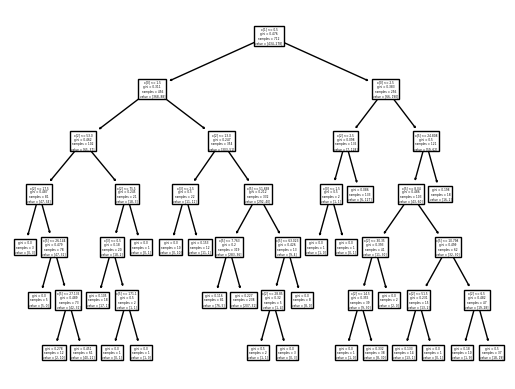

In [161]:
# print decision tree
tree.plot_tree(DT)



In [162]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0.0
1,1,1,38.0,1,0,71.2833,1.0
2,3,1,26.0,0,0,7.9250,0.0
3,1,1,35.0,1,0,53.1000,0.0
4,3,0,35.0,0,0,8.0500,0.0


In [163]:
idiot = [1, 1, 34, 0, 1, 8, 0]

DT.predict([idiot])

/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [164]:

KNN.predict([idiot])

/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [165]:
RF = RandomForestClassifier(n_estimators=61, max_depth=5, max_features=0.3)
RF.fit(X_train, y_train)
RF.score(X_test, y_test)

0.8770949720670391

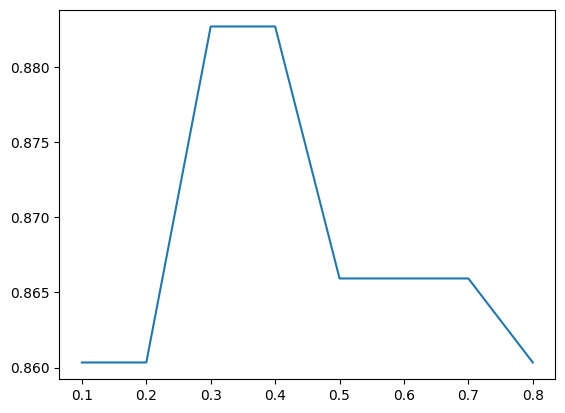

In [166]:
scores = []
vars = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
for i in vars:
    RF = RandomForestClassifier(n_estimators=61, max_depth=5, max_features=i, random_state=42)
    RF.fit(X_train, y_train)
    scores.append(RF.score(X_test, y_test))
plt.plot(vars, scores)
plt.show()